In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [79]:
df = pd.read_csv('songs_normalize.csv')
df = df.drop(df.columns[1], axis=1)
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [80]:
# Checking types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   duration_ms       2000 non-null   int64  
 2   explicit          2000 non-null   bool   
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   danceability      2000 non-null   float64
 6   energy            2000 non-null   float64
 7   key               2000 non-null   int64  
 8   loudness          2000 non-null   float64
 9   mode              2000 non-null   int64  
 10  speechiness       2000 non-null   float64
 11  acousticness      2000 non-null   float64
 12  instrumentalness  2000 non-null   float64
 13  liveness          2000 non-null   float64
 14  valence           2000 non-null   float64
 15  tempo             2000 non-null   float64
 16  genre             2000 non-null   object 


In [81]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


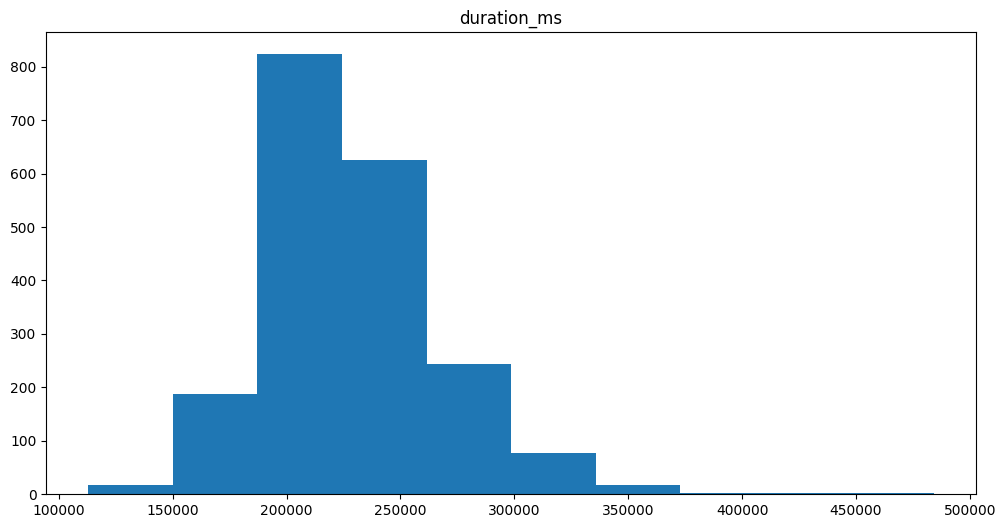

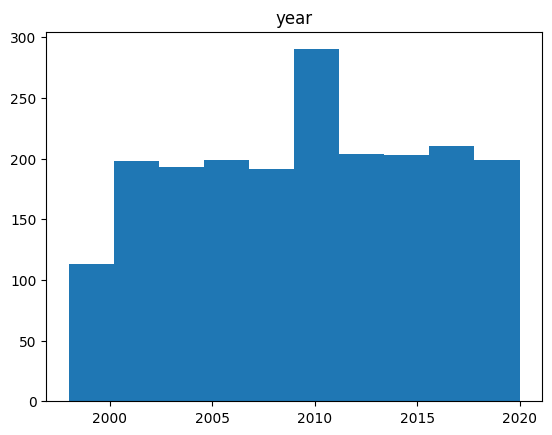

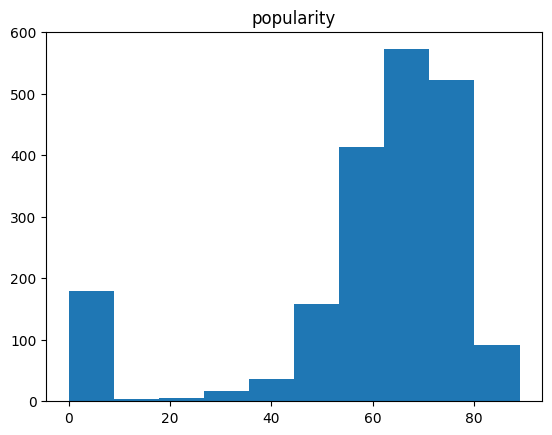

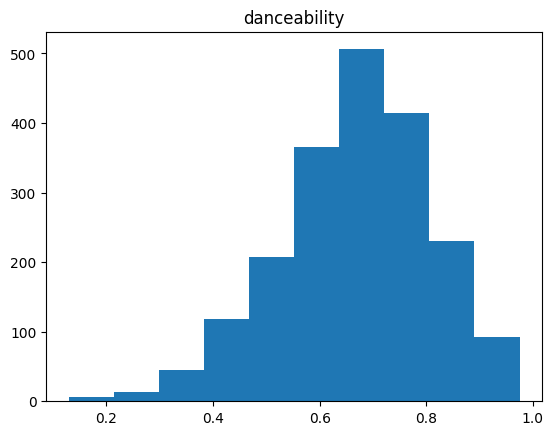

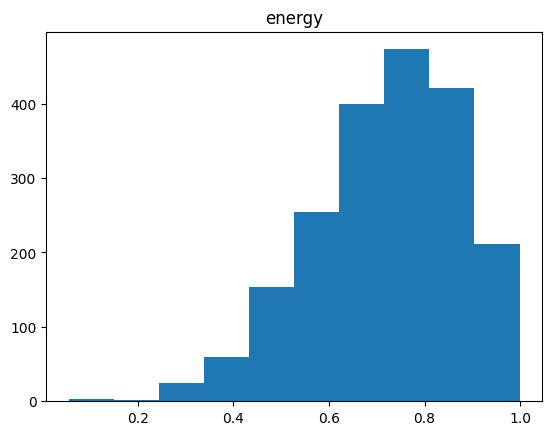

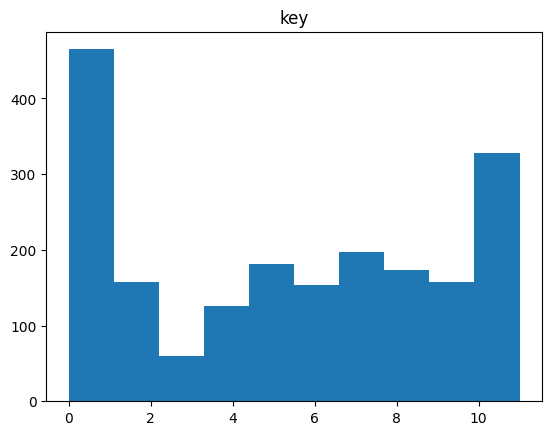

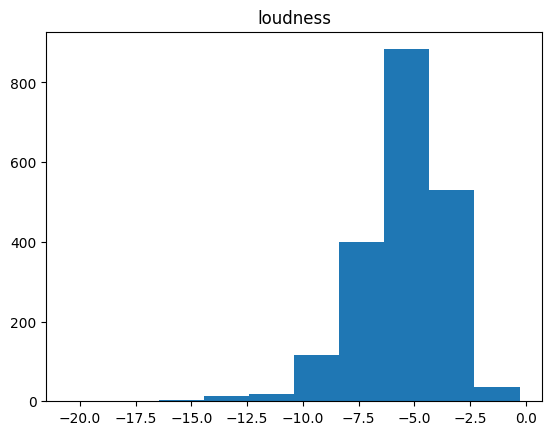

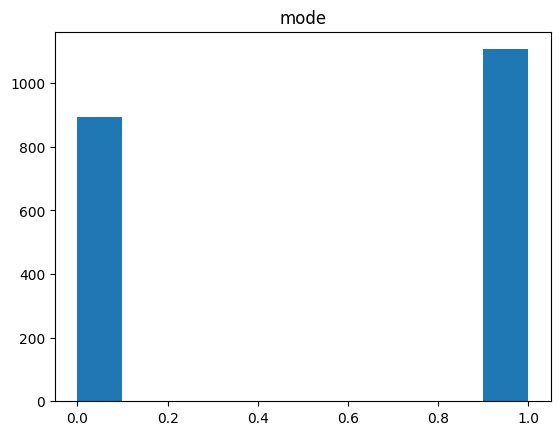

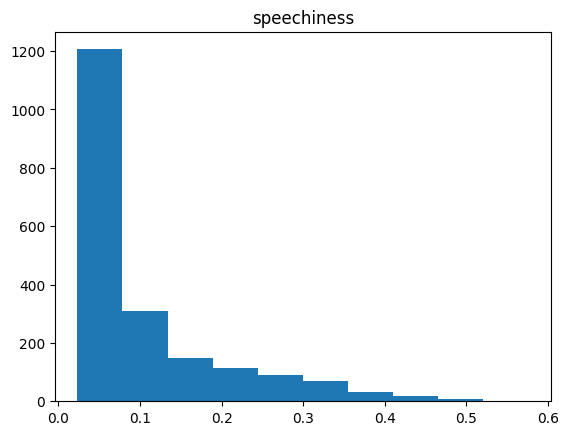

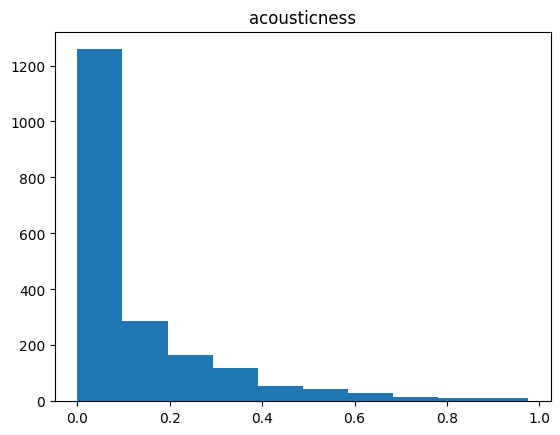

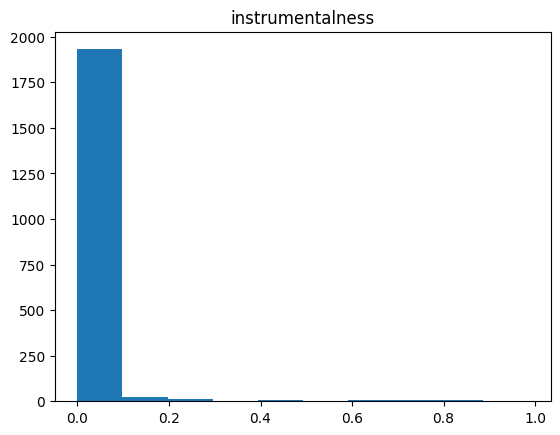

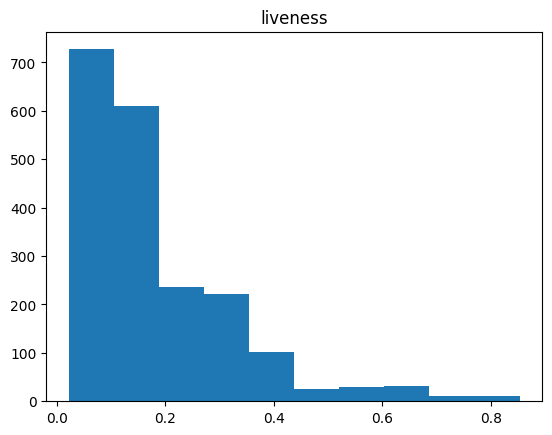

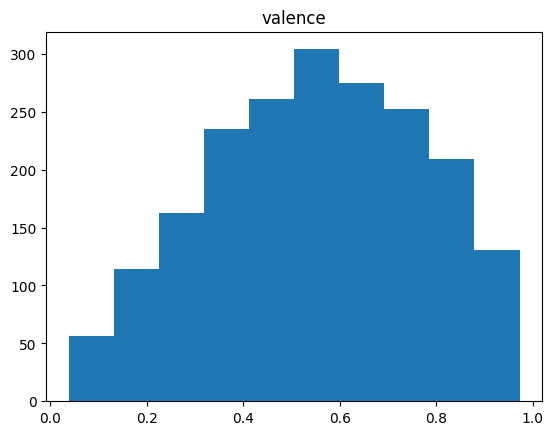

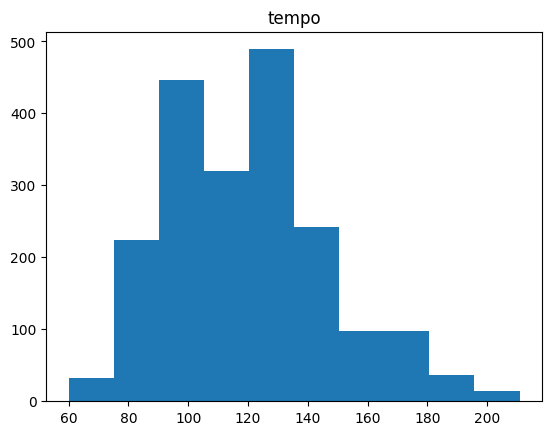

In [82]:
# List of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,6))
for i in numerical_features.columns:
    plt.hist(numerical_features[i])
    plt.title(i)
    plt.show()

                  duration_ms      year  popularity  danceability    energy  \
duration_ms          1.000000 -0.316534    0.050617     -0.060057 -0.078763   
year                -0.316534  1.000000   -0.003825      0.033532 -0.108644   
popularity           0.050617 -0.003825    1.000000     -0.003546 -0.014021   
danceability        -0.060057  0.033532   -0.003546      1.000000 -0.104038   
energy              -0.078763 -0.108644   -0.014021     -0.104038  1.000000   
key                 -0.002560  0.007380    0.014823      0.032731 -0.003446   
loudness            -0.079912  0.017479    0.030632     -0.033315  0.651016   
mode                -0.003848 -0.007358   -0.021353     -0.067528 -0.040651   
speechiness          0.066998  0.001111    0.021162      0.145590 -0.057018   
acousticness         0.010923  0.033809    0.024619     -0.065429 -0.445469   
instrumentalness    -0.004208 -0.050265   -0.048059      0.023207  0.037861   
liveness             0.024941 -0.027037   -0.009856 

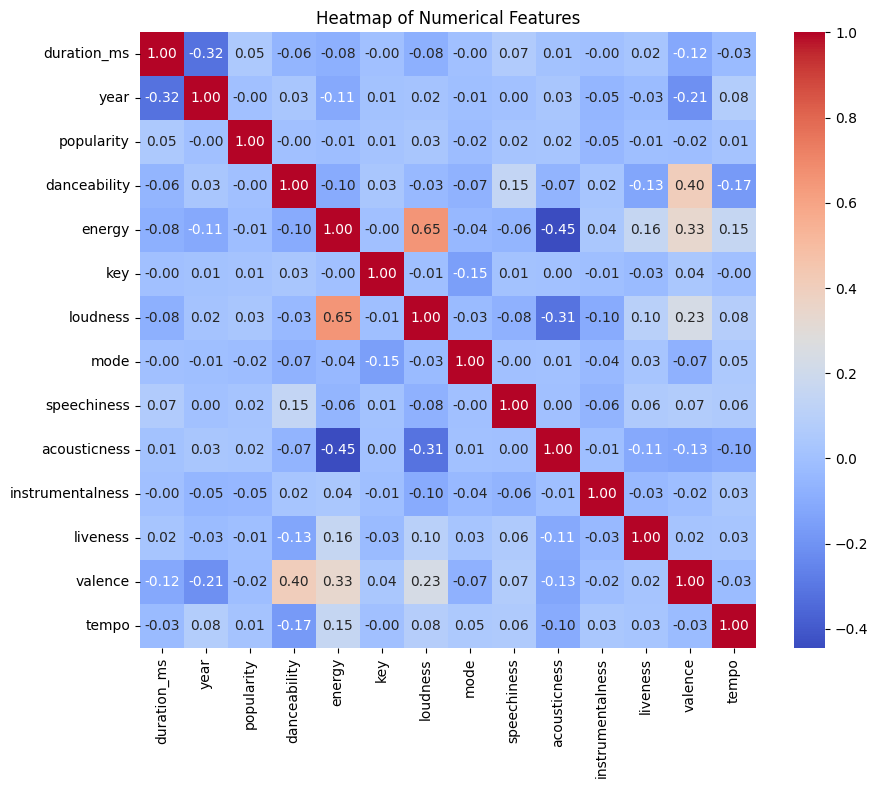

In [83]:
print(numerical_features.corr())
# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Size of the figure
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

In [84]:
pd.pivot_table(numerical_features, index='popularity')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
popularity,,,,,,,,,,,,,
0,0.118285,0.669175,217545.531746,0.732873,0.017535,5.007937,0.167537,-5.563357,0.587302,0.093918,121.049643,0.524407,2012.793651
1,0.191205,0.637677,211200.967742,0.650516,0.011238,5.290323,0.238016,-5.765968,0.645161,0.112439,124.105323,0.566774,2012.516129
2,0.140094,0.675273,224408.636364,0.681818,0.139586,6.000000,0.111655,-6.542727,0.636364,0.093391,107.312909,0.503273,2010.000000
3,0.020982,0.670600,227877.000000,0.597400,0.089400,5.000000,0.165880,-6.220000,0.800000,0.076940,93.747600,0.490800,2008.800000
4,0.255680,0.720000,225053.250000,0.483750,0.000001,8.000000,0.168150,-6.183000,0.750000,0.057275,119.037000,0.453500,2013.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.085657,0.629857,240036.142857,0.687000,0.021634,5.000000,0.180557,-5.162143,1.000000,0.058729,126.503143,0.506571,2013.000000
86,0.483825,0.603750,220272.500000,0.489500,0.000005,4.000000,0.082425,-7.435250,0.000000,0.037900,109.018750,0.418000,2012.750000
87,0.002860,0.908000,290320.000000,0.669000,0.000000,7.000000,0.237000,-2.827000,1.000000,0.073800,112.238000,0.662000,2002.000000


In [85]:
df_cat = df.select_dtypes(include=['object']).assign(popularity=df['popularity'])
df_cat.head()

,artist,genre,popularity
0,Britney Spears,pop,77
1,blink-182,"rock, pop",79
2,Faith Hill,"pop, country",66
3,Bon Jovi,"rock, metal",78
4,*NSYNC,pop,65


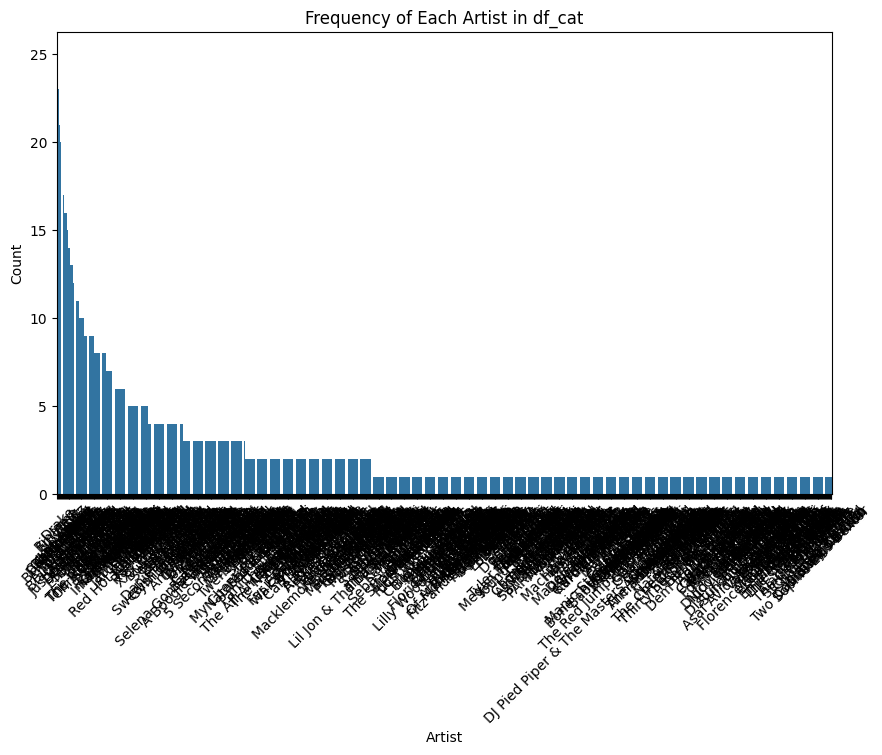

In [86]:
# Plotting the count of each artist
plt.figure(figsize=(10, 6))
sns.countplot(x='artist', data=df_cat, order=df_cat['artist'].value_counts().index)
plt.title('Frequency of Each Artist in df_cat')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

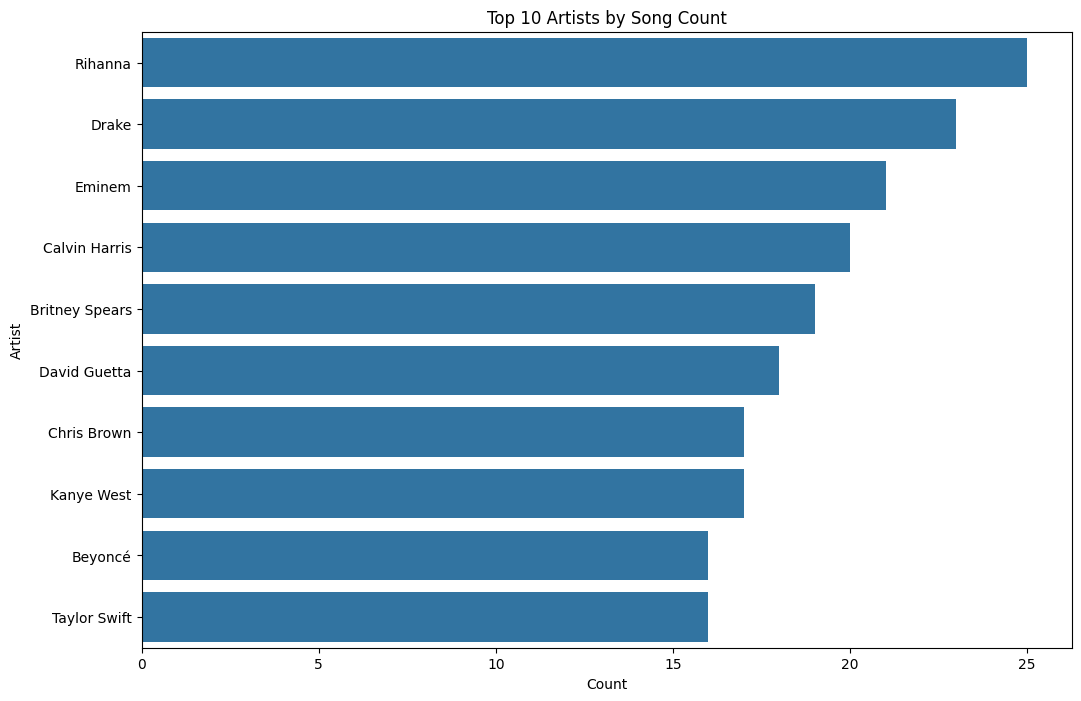

In [87]:
# Visualizing the counts of each artist (top 10)
plt.figure(figsize=(12, 8))
top_artists = df_cat['artist'].value_counts().head(10).index
sns.countplot(y='artist', data=df_cat[df_cat['artist'].isin(top_artists)], order=top_artists)
plt.title('Top 10 Artists by Song Count')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

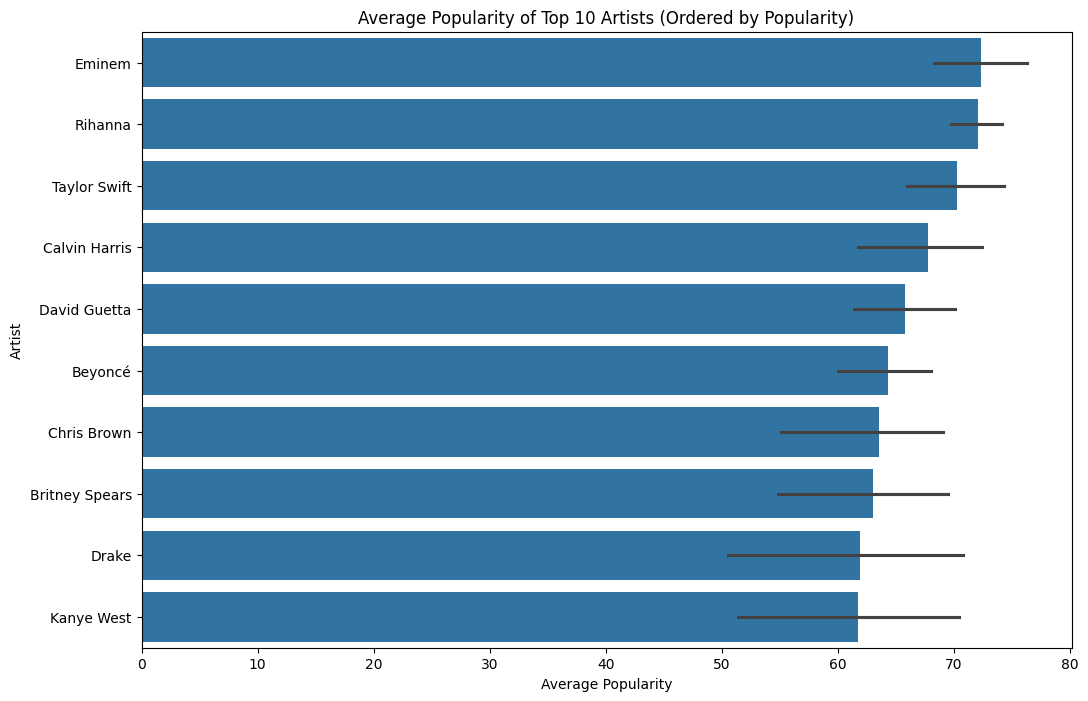

In [88]:
# Calculate the average popularity for each artist and sort them
artist_popularity = df_cat[df_cat['artist'].isin(top_artists)].groupby('artist')['popularity'].mean().sort_values(ascending=False).reset_index()

# Updated artists order based on sorted average popularity
sorted_artists = artist_popularity['artist']

# Visualizing the relationship between artists and their sorted average popularity
plt.figure(figsize=(12, 8))
sns.barplot(y='artist', x='popularity', data=df_cat[df_cat['artist'].isin(top_artists)], estimator=np.mean, order=sorted_artists)
plt.title('Average Popularity of Top 10 Artists (Ordered by Popularity)')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

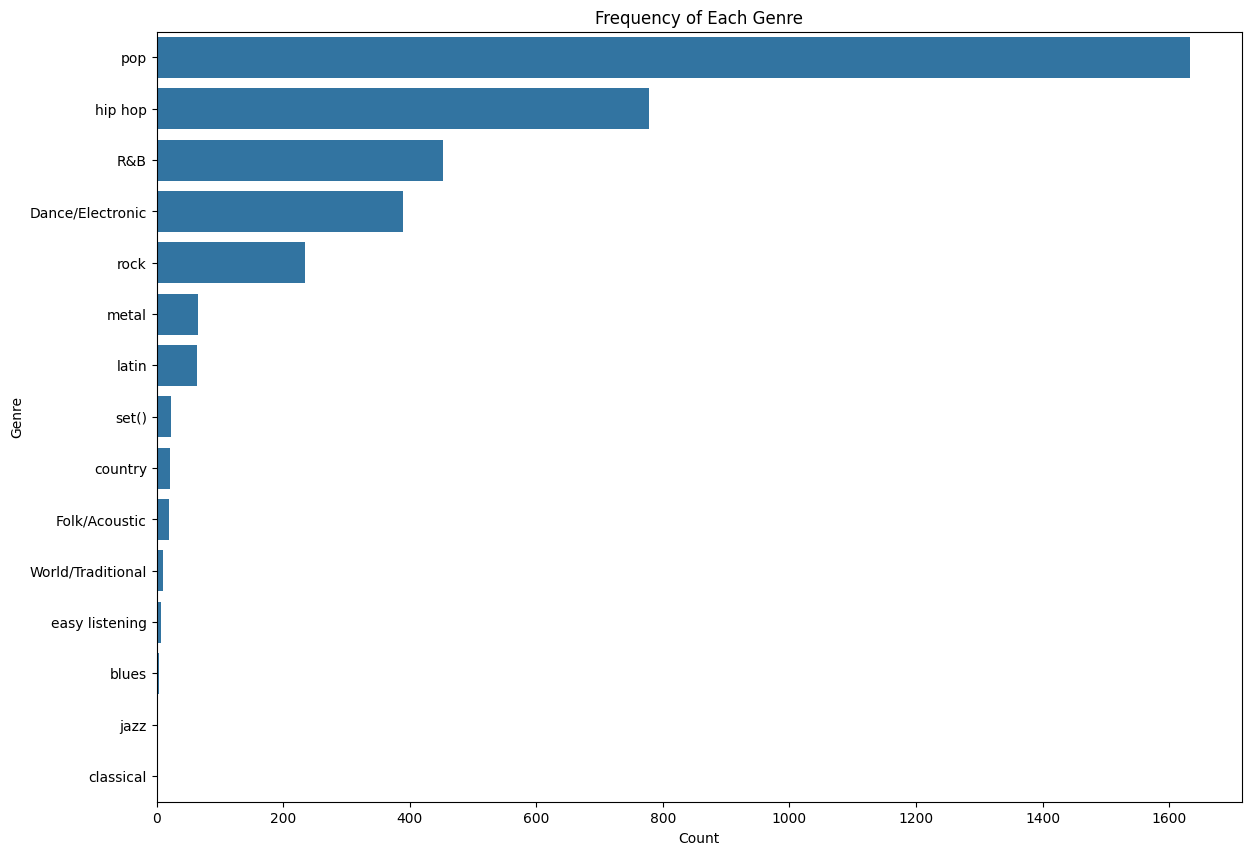

In [89]:
# Copy df_cat to avoid SettingWithCopyWarning when modifying data
df_cat_processed = df_cat.copy()

# Splitting the 'genre' column and creating a new DataFrame
df_cat_processed['genre_split'] = df_cat_processed['genre'].str.split(', ')
exploded_genres = df_cat_processed.explode('genre_split')

# Visualizing the counts of each genre
plt.figure(figsize=(14, 10))
sns.countplot(y='genre_split', data=exploded_genres, order=exploded_genres['genre_split'].value_counts().index)
plt.title('Frequency of Each Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

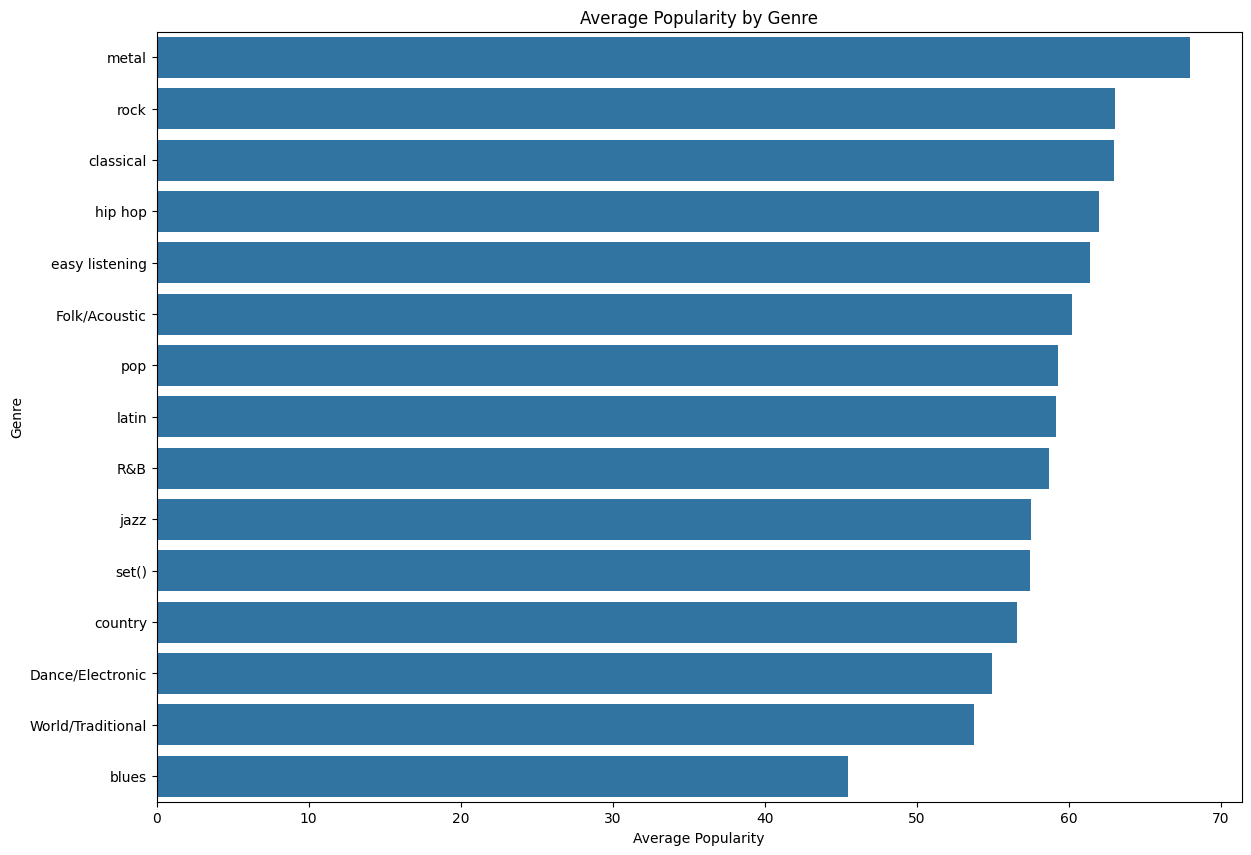

In [90]:
# Calculate the average popularity for each genre
genre_popularity = exploded_genres.groupby('genre_split')['popularity'].mean().sort_values(ascending=False).reset_index()

# Visualizing the relationship between genre and average popularity
plt.figure(figsize=(14, 10))
sns.barplot(y='genre_split', x='popularity', data=genre_popularity)
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


In [94]:
# Step 1: Split the 'genre' column into lists of genres
df['genre_split'] = df['genre'].str.split(', ')

# Step 2: Explode this list into a row per genre per song
exploded_df = df.explode('genre_split')

# Step 3: Create dummy variables for each genre
dummies = pd.get_dummies(exploded_df['genre_split'])

# Step 4: Sum these dummies back to the original song level
genre_dummies = dummies.groupby(exploded_df.index).sum()

# Step 5: Concatenate these new columns back to the original DataFrame
df_modified = pd.concat([df.drop(columns=['genre', 'genre_split']), genre_dummies], axis=1)

# Step 6: Dropping set()
df_modified = df_modified.drop(columns=['set()'])

# Show the updated DataFrame structure
df_modified.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,...,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
0,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,...,0,0,0,0,0,0,0,0,1,0
1,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,...,0,0,0,0,0,0,0,0,1,1
2,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,...,0,0,1,0,0,0,0,0,1,0
3,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,...,0,0,0,0,0,0,0,1,0,1
4,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,...,0,0,0,0,0,0,0,0,1,0
